2024-03-11 12:59:32.178969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 12:59:32.643440: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 113)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           3648        ['inputs[0][0]']                 
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 batch_normalization (BatchNorm  (None, 32)          128         ['dense_1[0][0]']                
 alization)                                                                                   

2024-03-11 12:59:33.380412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-11 12:59:33.397773: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


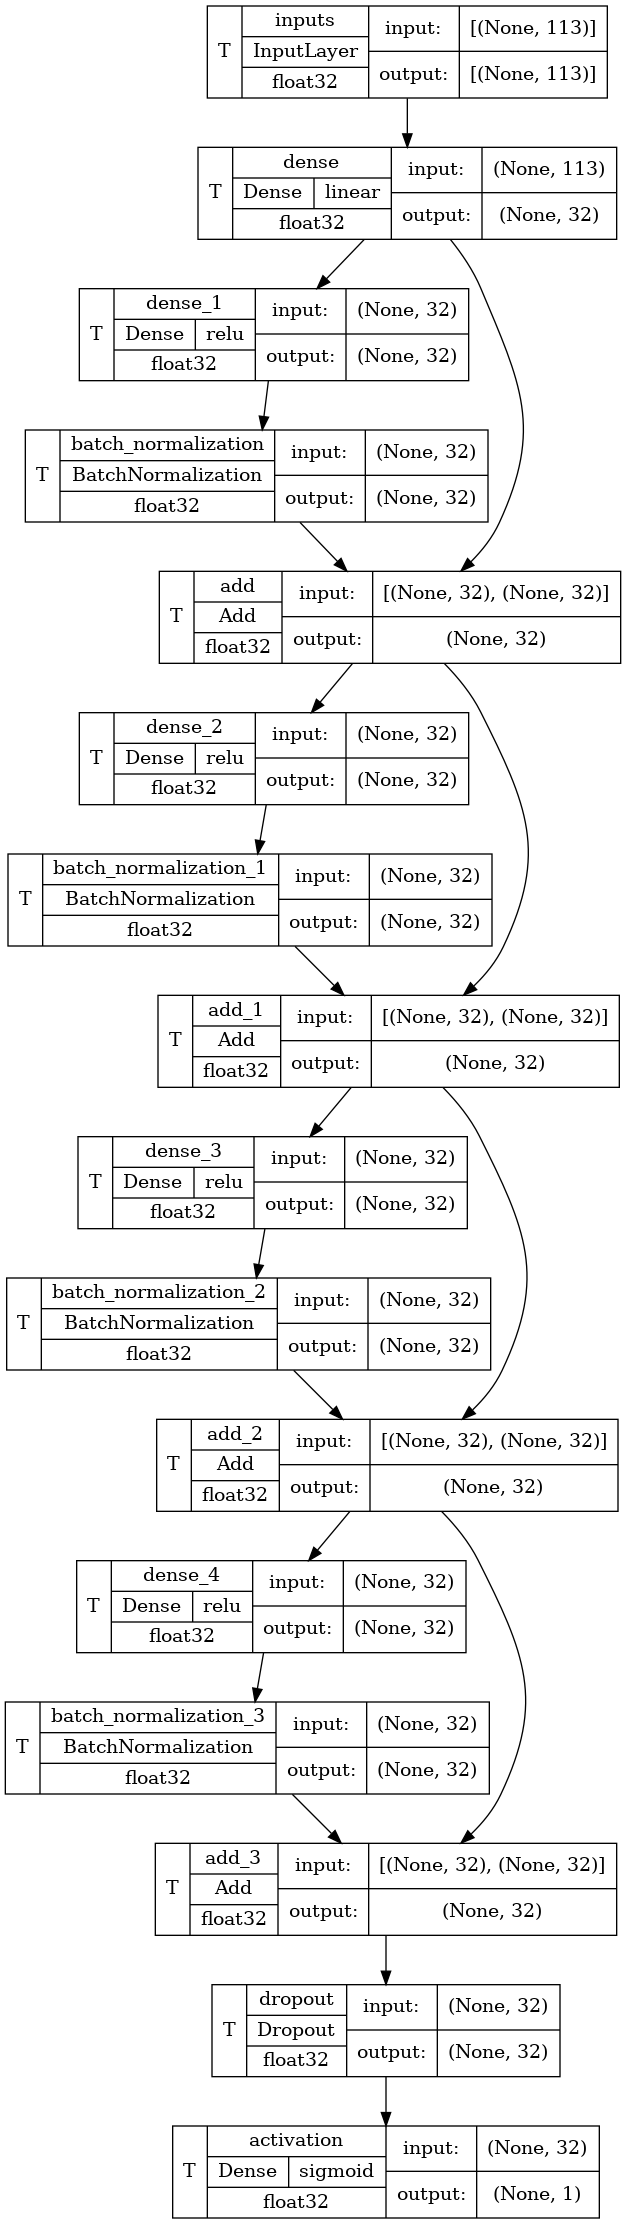

In [1]:
import tensorflow as tf

VEC_POS = 2
ACTION_CLASSES = 17
HAND = ACTION_CLASSES
DECK = ACTION_CLASSES
STATUS_CLASSES = 9
UNIT_ATTRIBUTES = 3

FF_SIZE = 32
NUM_RESIDUAL_BLOCKS = 4

cast_input_size = ACTION_CLASSES + VEC_POS
caster_input_size = UNIT_ATTRIBUTES + HAND + DECK + STATUS_CLASSES
opponent_input_size = VEC_POS + UNIT_ATTRIBUTES + HAND + DECK + STATUS_CLASSES

input_tensor = tf.keras.layers.Input(shape=(cast_input_size + caster_input_size + opponent_input_size,), name="inputs")


def res_block(size: int, block_input: tf.keras.layers.Layer):
    ff = tf.keras.layers.Dense(size, activation='relu')(block_input)
    bnorm = tf.keras.layers.BatchNormalization()(ff)
    return tf.keras.layers.Add()([block_input, bnorm])

x = tf.keras.layers.Dense(FF_SIZE)(input_tensor)
for _ in range(NUM_RESIDUAL_BLOCKS):
    x = res_block(FF_SIZE, x)
x = tf.keras.layers.Dropout(0.25, name="dropout")(x)
x = tf.keras.layers.Dense(1, activation="sigmoid", name="activation")(x)

model = tf.keras.models.Model(inputs=input_tensor, outputs=x)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])
model.summary()

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True
)


In [2]:
tf.test.is_gpu_available(
    cuda_only=True, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-03-11 12:59:33.688214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-11 12:59:33.688269: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


False

In [3]:
import pandas as pd
import numpy as np

path = "../gaf6/generated/"
csv_frames = []  # pd.read_csv(path + "data.csv")
headers = ['CAST_COMBINE_ACTIONS', 'CAST_WRATHSPARK', 'CAST_GROUNDRAISE', 'CAST_BLOODDRAWING', 'CAST_TREAD', 'CAST_ETERNALSHACLES', 'CAST_NETHERSWAP', 'CAST_WISPSPARKS', 'CAST_BONEDUST', 'CAST_BONESPARKS', 'CAST_RESPIRIT', 'CAST_SUNDIVE', 'CAST_METEORSHATTER', 'CAST_ARMORCORE', 'CAST_IMMOLATION', 'CAST_HOARFROST', 'CAST_RAPID_GROWTH', 'CAST_x', 'CAST_y', 'CAST_hp', 'CAST_mhp', 'CAST_spd', 'CAST_DECK_COMBINE_ACTIONS', 'CAST_DECK_WRATHSPARK', 'CAST_DECK_GROUNDRAISE', 'CAST_DECK_BLOODDRAWING', 'CAST_DECK_TREAD', 'CAST_DECK_ETERNALSHACLES', 'CAST_DECK_NETHERSWAP', 'CAST_DECK_WISPSPARKS', 'CAST_DECK_BONEDUST', 'CAST_DECK_BONESPARKS', 'CAST_DECK_RESPIRIT', 'CAST_DECK_SUNDIVE', 'CAST_DECK_METEORSHATTER', 'CAST_DECK_ARMORCORE', 'CAST_DECK_IMMOLATION', 'CAST_DECK_HOARFROST', 'CAST_DECK_RAPID_GROWTH', 'CAST_HAND_COMBINE_ACTIONS', 'CAST_HAND_WRATHSPARK', 'CAST_HAND_GROUNDRAISE', 'CAST_HAND_BLOODDRAWING', 'CAST_HAND_TREAD', 'CAST_HAND_ETERNALSHACLES', 'CAST_HAND_NETHERSWAP', 'CAST_HAND_WISPSPARKS', 'CAST_HAND_BONEDUST', 'CAST_HAND_BONESPARKS', 'CAST_HAND_RESPIRIT', 'CAST_HAND_SUNDIVE', 'CAST_HAND_METEORSHATTER', 'CAST_HAND_ARMORCORE', 'CAST_HAND_IMMOLATION', 'CAST_HAND_HOARFROST', 'CAST_HAND_RAPID_GROWTH', 'CAST_STATUS_BURN', 'CAST_STATUS_SLOW', 'CAST_STATUS_COUNTDOWN', 'CAST_STATUS_SHACLES', 'CAST_STATUS_DUSTED', 'CAST_STATUS_SPIRITING', 'CAST_STATUS_IMMOLATION', 'CAST_STATUS_CORE_ARMOR', 'CAST_STATUS_HOARFROST_ARMOR', 'TRG_x', 'TRG_y', 'TRG_hp', 'TRG_mhp', 'TRG_spd', 'TRG_DECK_COMBINE_ACTIONS', 'TRG_DECK_WRATHSPARK', 'TRG_DECK_GROUNDRAISE', 'TRG_DECK_BLOODDRAWING', 'TRG_DECK_TREAD', 'TRG_DECK_ETERNALSHACLES', 'TRG_DECK_NETHERSWAP', 'TRG_DECK_WISPSPARKS', 'TRG_DECK_BONEDUST', 'TRG_DECK_BONESPARKS', 'TRG_DECK_RESPIRIT', 'TRG_DECK_SUNDIVE', 'TRG_DECK_METEORSHATTER', 'TRG_DECK_ARMORCORE', 'TRG_DECK_IMMOLATION', 'TRG_DECK_HOARFROST', 'TRG_DECK_RAPID_GROWTH', 'TRG_HAND_COMBINE_ACTIONS', 'TRG_HAND_WRATHSPARK', 'TRG_HAND_GROUNDRAISE', 'TRG_HAND_BLOODDRAWING', 'TRG_HAND_TREAD', 'TRG_HAND_ETERNALSHACLES', 'TRG_HAND_NETHERSWAP', 'TRG_HAND_WISPSPARKS', 'TRG_HAND_BONEDUST', 'TRG_HAND_BONESPARKS', 'TRG_HAND_RESPIRIT', 'TRG_HAND_SUNDIVE', 'TRG_HAND_METEORSHATTER', 'TRG_HAND_ARMORCORE', 'TRG_HAND_IMMOLATION', 'TRG_HAND_HOARFROST', 'TRG_HAND_RAPID_GROWTH', 'TRG_STATUS_BURN', 'TRG_STATUS_SLOW', 'TRG_STATUS_COUNTDOWN', 'TRG_STATUS_SHACLES', 'TRG_STATUS_DUSTED', 'TRG_STATUS_SPIRITING', 'TRG_STATUS_IMMOLATION', 'TRG_STATUS_CORE_ARMOR', 'TRG_STATUS_HOARFROST_ARMOR', 'EXPLOIT']

for i in range(15):
    cdf = pd.read_csv(path + f"data{i}.csv", names=headers)
    csv_frames.append(cdf)

# for i in range(15):
#     cdf = pd.read_csv(f"../gaf6/old_generated/data{i}.csv")
#     csv_frames.append(cdf)
#
# csv_frames.append(pd.read_csv("../gaf6/old_generated/data.csv"))

df = pd.concat(csv_frames, axis=0, ignore_index=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127156 entries, 0 to 127155
Columns: 114 entries, CAST_COMBINE_ACTIONS to EXPLOIT
dtypes: float64(1), int64(113)
memory usage: 110.6 MB


,CAST_COMBINE_ACTIONS,CAST_WRATHSPARK,CAST_GROUNDRAISE,CAST_BLOODDRAWING,CAST_TREAD,CAST_ETERNALSHACLES,CAST_NETHERSWAP,CAST_WISPSPARKS,CAST_BONEDUST,CAST_BONESPARKS,...,TRG_STATUS_BURN,TRG_STATUS_SLOW,TRG_STATUS_COUNTDOWN,TRG_STATUS_SHACLES,TRG_STATUS_DUSTED,TRG_STATUS_SPIRITING,TRG_STATUS_IMMOLATION,TRG_STATUS_CORE_ARMOR,TRG_STATUS_HOARFROST_ARMOR,EXPLOIT
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0.984467
1,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0.966424
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0.990461
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.978882
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.000000


In [4]:
# Normalize columns and convert bools to 0-1

def norm(series):
    return (series - np.min(series)) / (np.max(series) - np.min(series))

for col, col_type in zip(df.columns, df.dtypes):
    if col_type == bool:
        df[col] = df[col].map(float)
    else:
        df[col] = norm(df[col])

df.fillna(0, inplace=True)
df.head()

,CAST_COMBINE_ACTIONS,CAST_WRATHSPARK,CAST_GROUNDRAISE,CAST_BLOODDRAWING,CAST_TREAD,CAST_ETERNALSHACLES,CAST_NETHERSWAP,CAST_WISPSPARKS,CAST_BONEDUST,CAST_BONESPARKS,...,TRG_STATUS_BURN,TRG_STATUS_SLOW,TRG_STATUS_COUNTDOWN,TRG_STATUS_SHACLES,TRG_STATUS_DUSTED,TRG_STATUS_SPIRITING,TRG_STATUS_IMMOLATION,TRG_STATUS_CORE_ARMOR,TRG_STATUS_HOARFROST_ARMOR,EXPLOIT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992233
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983212
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995231
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010559
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [5]:
# Split input and output (X and Y)
predict = 'EXPLOIT'

X = np.array(df.drop(predict, axis=1))  # Features
y = np.array(df[predict])  # Labels

In [6]:
# # Random forest
# import tensorflow_decision_forests as tfdt
#
# tf_dataset = tfdt.keras.pd_dataframe_to_tf_dataset(df, label="EXPLOIT")
# model = tfdf.keras.RandomForestModel()
# model.fit(tf_dataset)

In [7]:
# duplicate detection

d = {}
dupes = 0
total_rows = 0

for row in df.iterrows():
    total_rows += 1
    index, *row_data = row
    *key, value = row_data[0]
    tkey = tuple(key)
    if tkey in d:
        dupes += 1
        diff = abs(value - d[tkey])

        if diff < 0.1:
            continue
        print("!!! High Difference duplicate !!!")
        print(f"existing: {d[tkey]} \tnew: {value}\tdiff: {diff}")
        print(tkey)

    else:
        d[tkey] = value
    # break
print(f"total dupes {dupes} ({round(dupes/total_rows*100)}%)")

!!! High Difference duplicate !!!
existing: 0.29942250000000004 	new: 0.1502695	diff: 0.14915300000000004
(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.038461538461538464, 0.0, 0.5, 0.9333333333333333, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.038461538461538464, 0.2692307692307692, 0.47368421052631576, 0.3333333333333333, 0.7, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)
!!! High Difference duplicate !!!
existing: 0.28423149999999997 	new: 0.16617949999999998	diff: 0.11805199999999999
(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.42307692307692

In [8]:
model.fit(X, y, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
3577/3577 [==============================] - 7s 2ms/step - loss: 0.5773 - accuracy: 0.0379 - val_loss: 0.5010 - val_accuracy: 0.0466
Epoch 2/100
3577/3577 [==============================] - 5s 2ms/step - loss: 0.5164 - accuracy: 0.0392 - val_loss: 0.4809 - val_accuracy: 0.0462
Epoch 3/100
3577/3577 [==============================] - 5s 1ms/step - loss: 0.5042 - accuracy: 0.0393 - val_loss: 0.4797 - val_accuracy: 0.0462
Epoch 4/100
3577/3577 [==============================] - 5s 1ms/step - loss: 0.4984 - accuracy: 0.0394 - val_loss: 0.4775 - val_accuracy: 0.0462
Epoch 5/100
3577/3577 [==============================] - 5s 1ms/step - loss: 0.4939 - accuracy: 0.0394 - val_loss: 0.4780 - val_accuracy: 0.0466
Epoch 6/100
3577/3577 [==============================] - 5s 1ms/step - loss: 0.4912 - accuracy: 0.0395 - val_loss: 0.4772 - val_accuracy: 0.0463
Epoch 7/100
3577/3577 [==============================] - 5s 1ms/step - loss: 0.4887 - accuracy: 0.0395 - val_loss: 0.4793 - val_ac

In [12]:
loss, accuracy = model.evaluate(X, y)

def sigmoid(logits):
    # converts from -inf, inf to 0-1 range
    return 1 / (1 + np.exp(-logits))

import random

for i in range(20):
    random_index = random.randint(0, len(df))
    data = df.loc[random_index]
    ground_truth = data[-1]
    log_prediction = model.predict(np.expand_dims(data[:-1], axis=0), )[0][0]
    prediction = sigmoid(log_prediction)
    prediction = log_prediction
    print(f"Data({random_index})\tTruth:{round(ground_truth,2)}\tPred:{round(prediction,2)}\t(log: {round(log_prediction,5)})")


print(model.vcon)

1/1 [==============================] - 0s 11ms/step
Data(21740)	Truth:0.99	Pred:0.9900000095367432	(log: 0.9936100244522095)
1/1 [==============================] - 0s 10ms/step
Data(10069)	Truth:0.03	Pred:0.009999999776482582	(log: 0.011649999767541885)
1/1 [==============================] - 0s 10ms/step
Data(20060)	Truth:0.97	Pred:0.9300000071525574	(log: 0.9332299828529358)
1/1 [==============================] - 0s 11ms/step
Data(75062)	Truth:0.65	Pred:0.6100000143051147	(log: 0.6130399703979492)
1/1 [==============================] - 0s 12ms/step
Data(93162)	Truth:0.31	Pred:0.3100000023841858	(log: 0.30577999353408813)
1/1 [==============================] - 0s 11ms/step
Data(19996)	Truth:0.01	Pred:0.0	(log: 0.0016799999866634607)
1/1 [==============================] - 0s 10ms/step
Data(97644)	Truth:0.05	Pred:0.36000001430511475	(log: 0.3560200035572052)
1/1 [==============================] - 0s 11ms/step
Data(52822)	Truth:0.75	Pred:0.6100000143051147	(log: 0.6108099818229675)
1/1 [=

AttributeError: 'Functional' object has no attribute 'vcon'

In [ ]:
import os

model_save_path = "./dueler_model/"
if not os.path.isdir(model_save_path):
    os.mkdir(model_save_path)

tf.saved_model.save(model, model_save_path)
